In [1]:
import pandas as pd
import numpy as np

# Simple Linear Regression

### Question 1

In [2]:
#Read the housing.csv file provided on elearning
data = pd.read_csv("C:/Users/user/Desktop/housing.csv", index_col = 0)
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


### Question 2

In [3]:
#What is the number of features and instances in the data
data.shape

(546, 12)

In [4]:
#What is the datatype of the features
data.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

In [5]:
#Are there any missing values? If yes which features have missing values
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [6]:
#Therefore we do not have missing values

### Question 3

In [7]:
#Obtain the first 70% of the dataset
percentage = int(.7 * len(data))
train_data = data.iloc[:percentage]
train_data.shape

(382, 12)

In [8]:
#Independent (x) - lotsize
#Dependent (y) - price of a house

In [9]:
import matplotlib.pyplot as plt

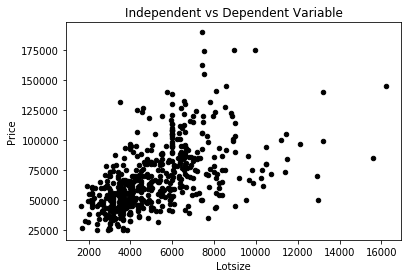

In [10]:
#Draw a scatter plot of the two variables
plt.scatter(data.lotsize, data.price, s = 20, color = 'black')

plt.title('Independent vs Dependent Variable')
plt.xlabel('Lotsize')
plt.ylabel('Price')

plt.show()

In [11]:
#Create a user defined function that receives the two variables and returns a regression model

def linear_reg(X, Y):
    numerator = 0
    denominator = 0

    for i, v in enumerate(X):
        numerator += (v - X.mean()) * (Y[i] - Y.mean()) 
        denominator += ((v - X.mean()) ** 2)

        m = numerator / denominator

        #using 
        #y = mx + c 
        #as 
        #house_price_mean = m * lot_size_mean + c
        #c = house_price_mean - (m * lot_size_mean)
        c = Y.mean() - (m * X.mean())

    #What is the linear regression model learned?
    print('y = ', m,'* x + ', c)

In [12]:
#What is the linear regression model learned?
linear_reg(train_data.lotsize.values, train_data.price.values)

y =  7.551670065490921 * x +  27930.188218578696


### Question 4

In [13]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [14]:
#Remove non-numric data
#df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
data.replace(['yes', 'no'], [1,0], inplace = True)
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.lotsize.values
X = X.reshape(len(X), 1)

#Use sklearn’s train_test_split() method to split your data(70% for training and 30% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, data.price.values, test_size=0.3)
# X_train, X_test, Y_train, Y_test = train_test_split(data.lotsize, data.price, test_size=0.3)

#Explain how the train_test_split() method works and what arguments it takes
#This method splits datasets into random train and test subsets and takes in the independent variable(s), dependent variables and amount to split the dataset as well as an optional field to change randomness of data selected

linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

#What is the linear regression model that is learned?
Y_predictions = linear_regression.predict(X_test)

In [36]:
#What is the linear regression model learned?
print('y = ', linear_regression.coef_,'* x + ', linear_regression.intercept_)

y =  [6.4053045] * x +  35096.25868230256


In [37]:
#User defined function with train split data
linear_reg(X_train, Y_train)

y =  [6.4053045] * x +  [35096.2586823]


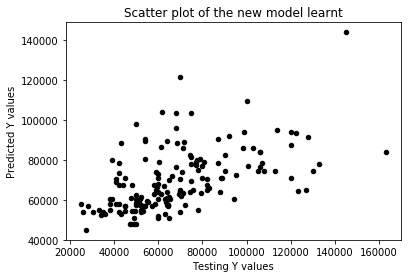

In [18]:
#Redraw the scatter plot of both the dependent and independent variable that was learnt
plt.scatter(Y_test, Y_predictions, s = 20, color = 'black')

plt.title('Scatter plot of the new model learnt')
plt.xlabel('Testing Y values')
plt.ylabel('Predicted Y values')

plt.show()

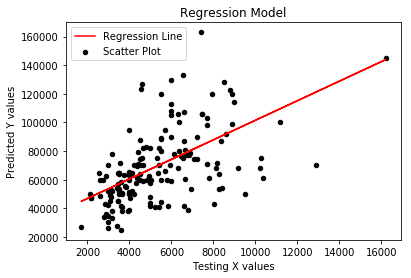

In [19]:
#Plot a line of the learned regression model. Hint(X_test against predicted Y).
plt.scatter(X_test, Y_test, s = 20, color = 'black', label = 'Scatter Plot')
plt.plot(X_test, Y_predictions, color = 'red', label = 'Regression Line')

plt.title('Regression Model')
plt.xlabel('Testing X values')
plt.ylabel('Predicted Y values')
plt.legend()

plt.show()

In [20]:
#Use numpy functions to determine the SSE and MSE of the learned model

# lot_size = train_data.lotsize
# house_price = train_data.price

# MSE = np.square(np.subtract(Y_test, Y_predictions)).mean()
MSE = np.mean((linear_regression.predict(X_test) - Y_test) ** 2)
print('MSE = ', MSE)


SSE = np.sum((train_data.price - train_data.price.mean()) ** 2)

print('SSE = ', SSE)

MSE =  462535150.07047236
SSE =  286394061949.2906


In [21]:
#Determine the coefficient of determination of the model
coeff = linear_regression.score(X_train, Y_train)
coeff

0.286200045635442

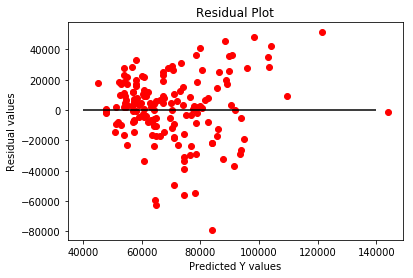

In [22]:
#Construct a residual plot
plt.scatter(linear_regression.predict(X_test), linear_regression.predict(X_test) - Y_test, color = 'red')
plt.hlines(y = 0, xmin = 40000, xmax = 140000)

plt.title('Residual Plot')
plt.xlabel('Predicted Y values')
plt.ylabel('Residual values')


plt.show()

# Multiple Linear Regression

In [23]:
#Import load_boston the dataset from sklearn.datasets
from sklearn.datasets import load_boston

#Call the method load_boston() and save it in a variable called boston
boston = load_boston()

In [24]:
#What is the type of the variable?
type(boston)

sklearn.utils.Bunch

In [25]:
#Explore the boston variable to view the data, feature_names, target and DESCR
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [26]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [28]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
#Create a dataframe from the data in boston
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
target = pd.DataFrame(boston.target, columns = ['MEDV'])
target.head(5)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [31]:
#divide the data into training and testing sets
mulit_X_train, mulit_X_test, mulit_Y_train, mulit_Y_test = train_test_split(dataset, target.values, test_size=0.3)

In [32]:
#Create a multiple linear regression model
multi_linear = LinearRegression()
multi_linear.fit(mulit_X_train, mulit_Y_train)

Y_predictions = multi_linear.predict(mulit_X_test)

In [33]:
#What is the multiple linear regression model learned?
print('y = ', multi_linear.coef_,'* x + ', multi_linear.intercept_)

y =  [[-1.07732905e-01  5.58977609e-02  8.11876419e-02  2.35024637e+00
  -1.75954888e+01  3.52565595e+00  1.77642115e-02 -1.47776278e+00
   2.86625497e-01 -1.19515939e-02 -8.60376414e-01  1.17590782e-02
  -6.41095568e-01]] * x +  [35.18866592]


In [34]:
#Evaluate your model by determining the SSE, MSE and coefficient of determination.
MSE = np.mean((multi_linear.predict(mulit_X_test) - mulit_Y_test) ** 2)
print('MSE = ', MSE)


SSE = np.sum((target.values - target.values.mean()) ** 2)
print('SSE = ', SSE)


coeff = multi_linear.score(mulit_X_train, mulit_Y_train)
print('Coefficient of determination = ', coeff)

MSE =  23.711503062238965
SSE =  42716.29541501977
Coefficient of determination =  0.7499511236526657
